In [ ]:
# we start by importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import make_pipeline # Import the make_pipeline function
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge # Import the Ridge class

from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows",1000)


In [ ]:
# Reading the csv file into pandas dataframe

bike=pd.read_csv('day.csv')

In [ ]:
# There are in total 16 variables

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# we look at the info for all columns

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# We focus only on the data types
bike.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [ ]:
# We summarize the dataframe with the key statistics for each variable (features and target)
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# We look at the number of unique values for each variable
bike.nunique()

,0
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


In [ ]:
# we check if there is any missing value present for the variables. There is no missing value
bike.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# we check for duplicate entries. There is no duplicate rows present in the dataset
bike.duplicated().sum()

0

In [ ]:
# Now we begin to filter the dataframe
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# drop features that are not important and utilizing the fact that 'casual'+'registered'='cnt' and 'cnt' is the target variable

bike.drop(['dteday','casual','registered','instant'],axis=1,inplace=True)

In [ ]:
# we do a quick distribution check for all the variables after dropping the above
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# EDA
# Univariate for categorical features

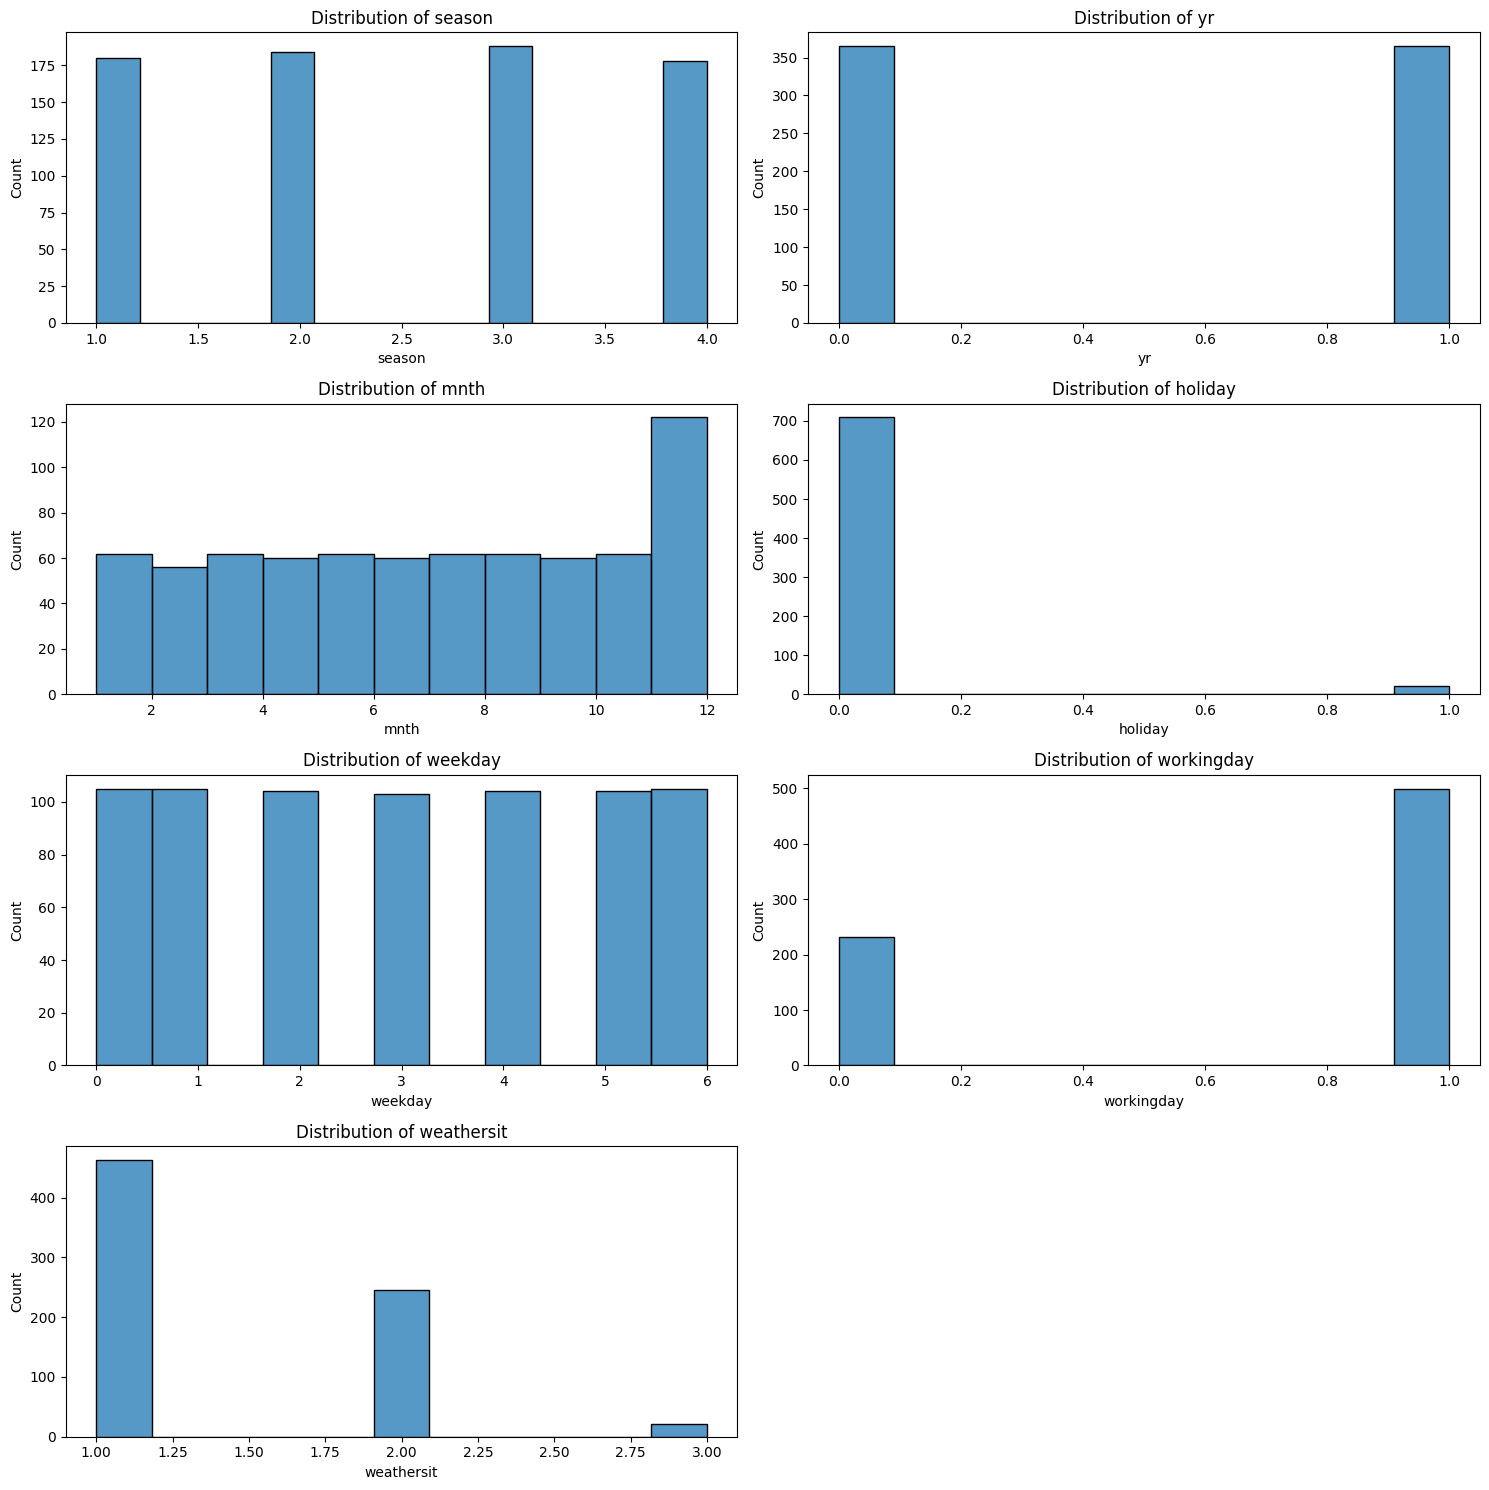

In [ ]:
# Define categorical features
cat_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create subplots with 7 axes
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over categorical features and create histograms
for i, feature in enumerate(cat_features):
    sns.histplot(bike[feature], ax=axes[i], kde=False)
    axes[i].set_title(f'Distribution of {feature}')

# Remove the 8th subplot
fig.delaxes(axes[7])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Univariate Continuous features

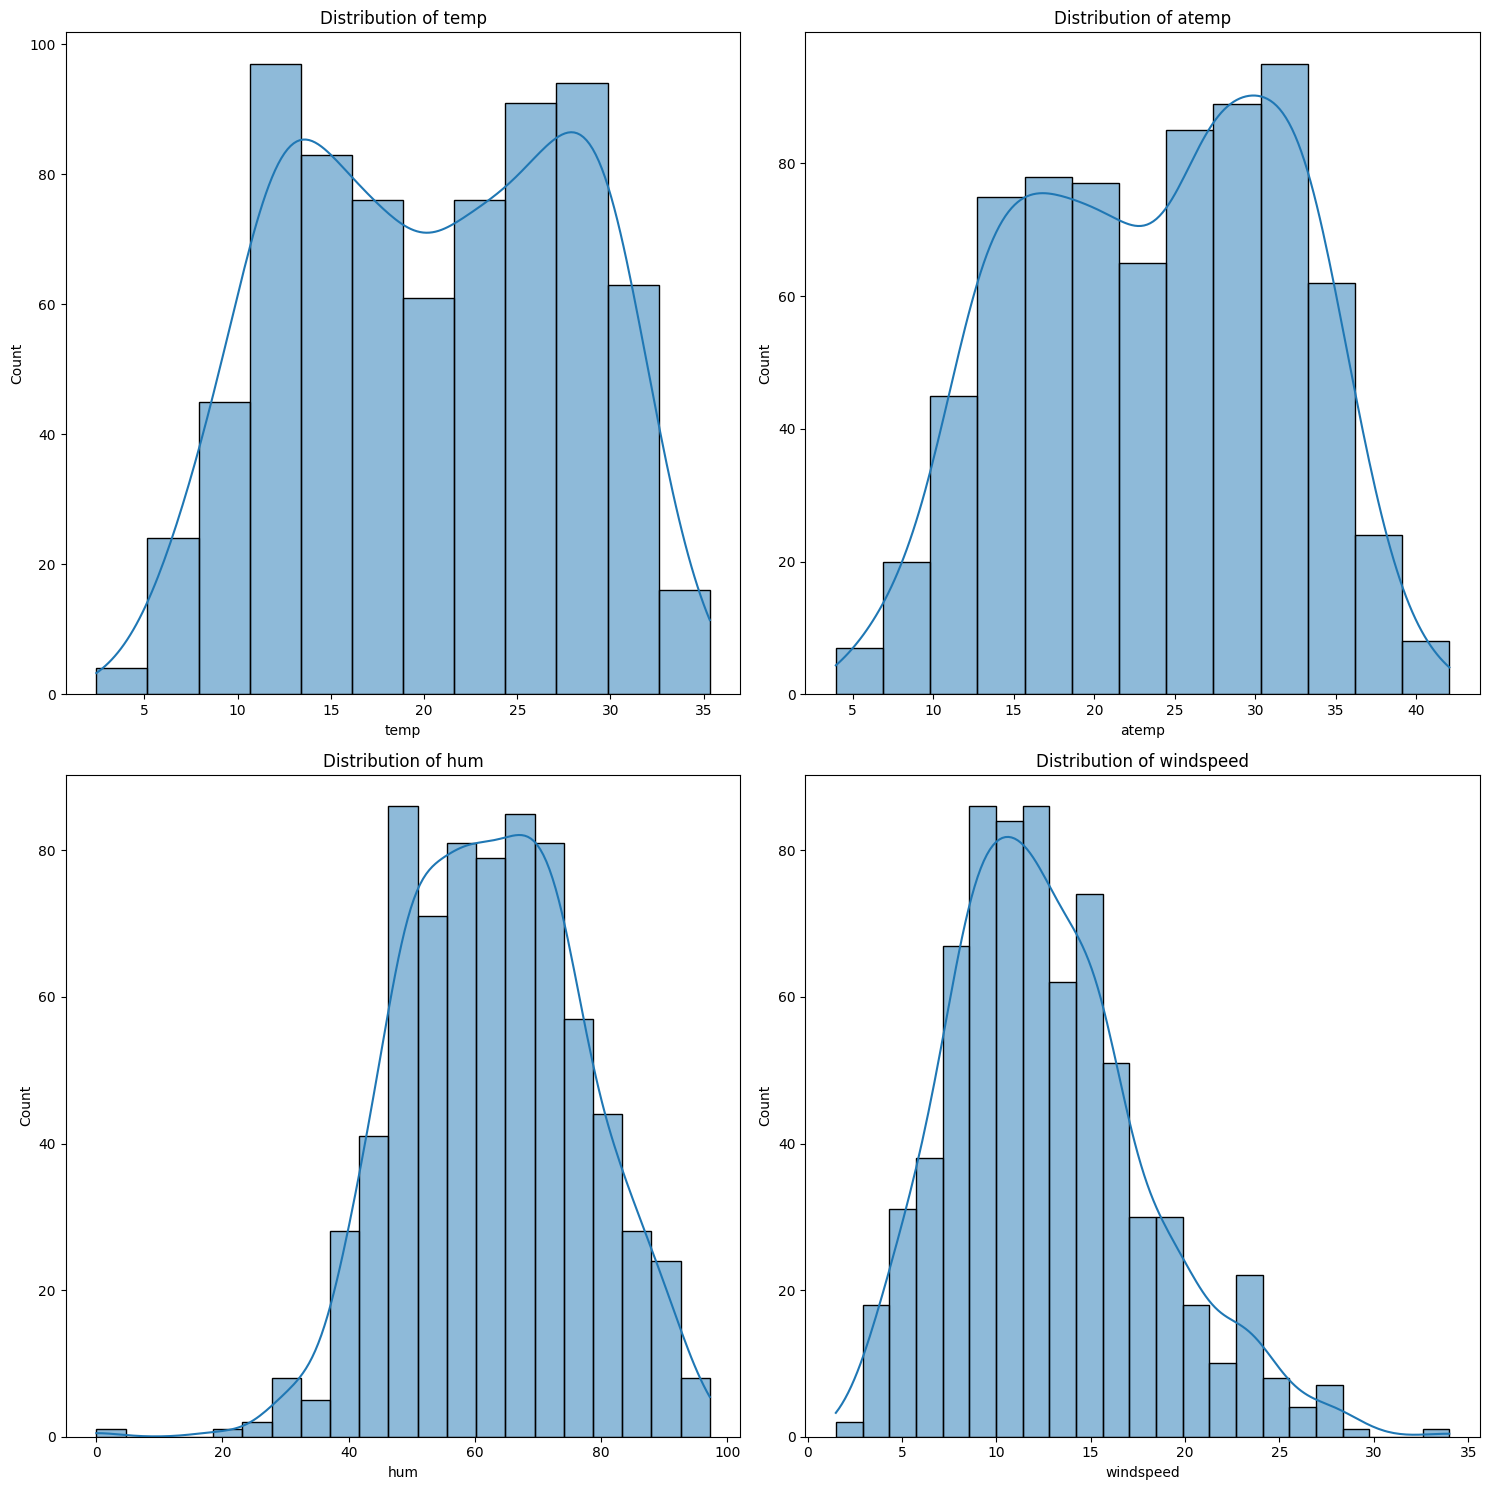

In [ ]:
num_vars=["temp","atemp","hum","windspeed"]

# Create subplots with 7 axes
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over categorical features and create histograms
for i, feature in enumerate(num_vars):
    sns.histplot(bike[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



## Distribution of continuous variables to identify outliers

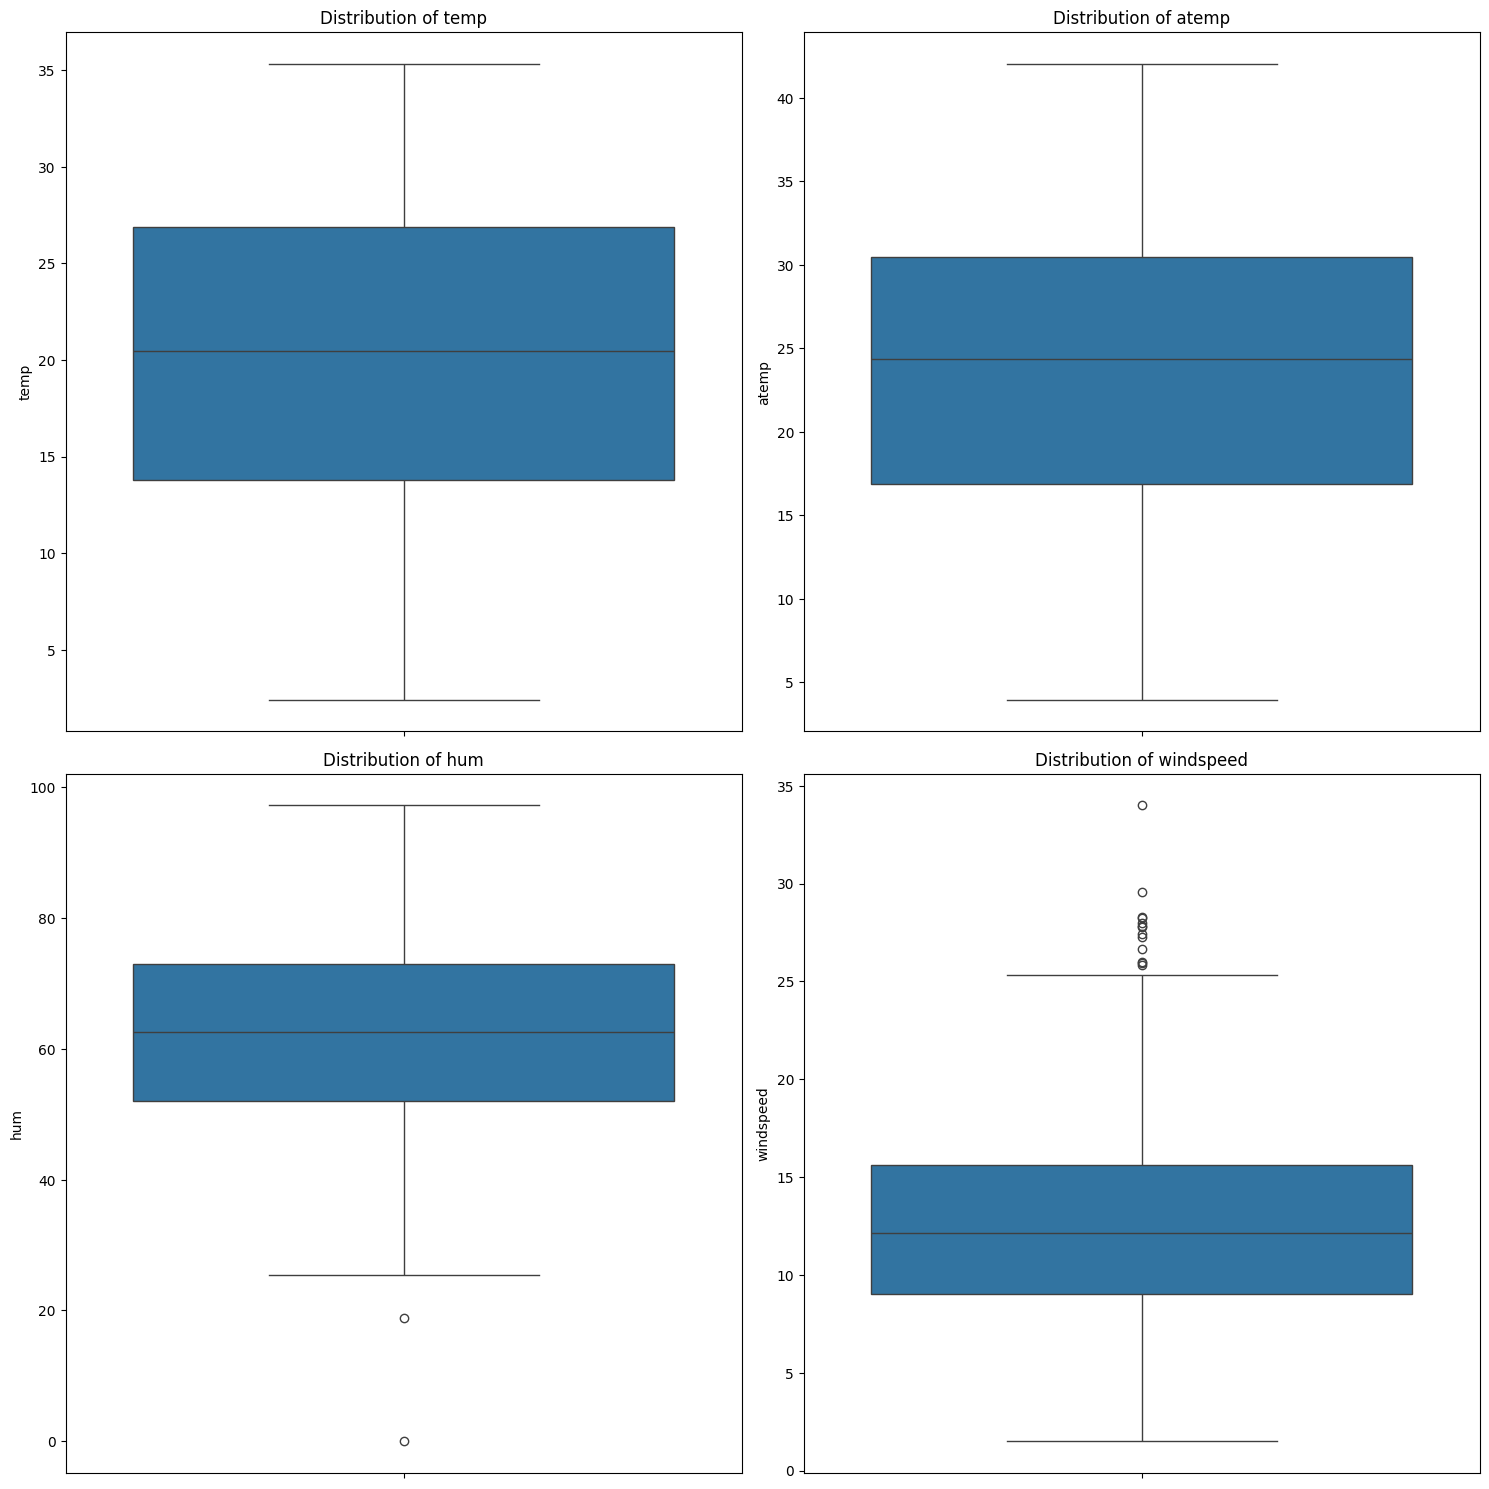

In [ ]:
num_vars=["temp","atemp","hum","windspeed"]

# Create subplots with 7 axes
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over categorical features and create histograms
for i, feature in enumerate(num_vars):
    sns.boxplot(bike[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Windspeed has a few outliers

In [ ]:
# Removing outliers

# Calculate IQR for windspeed
Q1 = bike['windspeed'].quantile(0.25)
Q3 = bike['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers from windspeed
bike = bike[(bike['windspeed'] >= lower_bound) & (bike['windspeed'] <= upper_bound)]

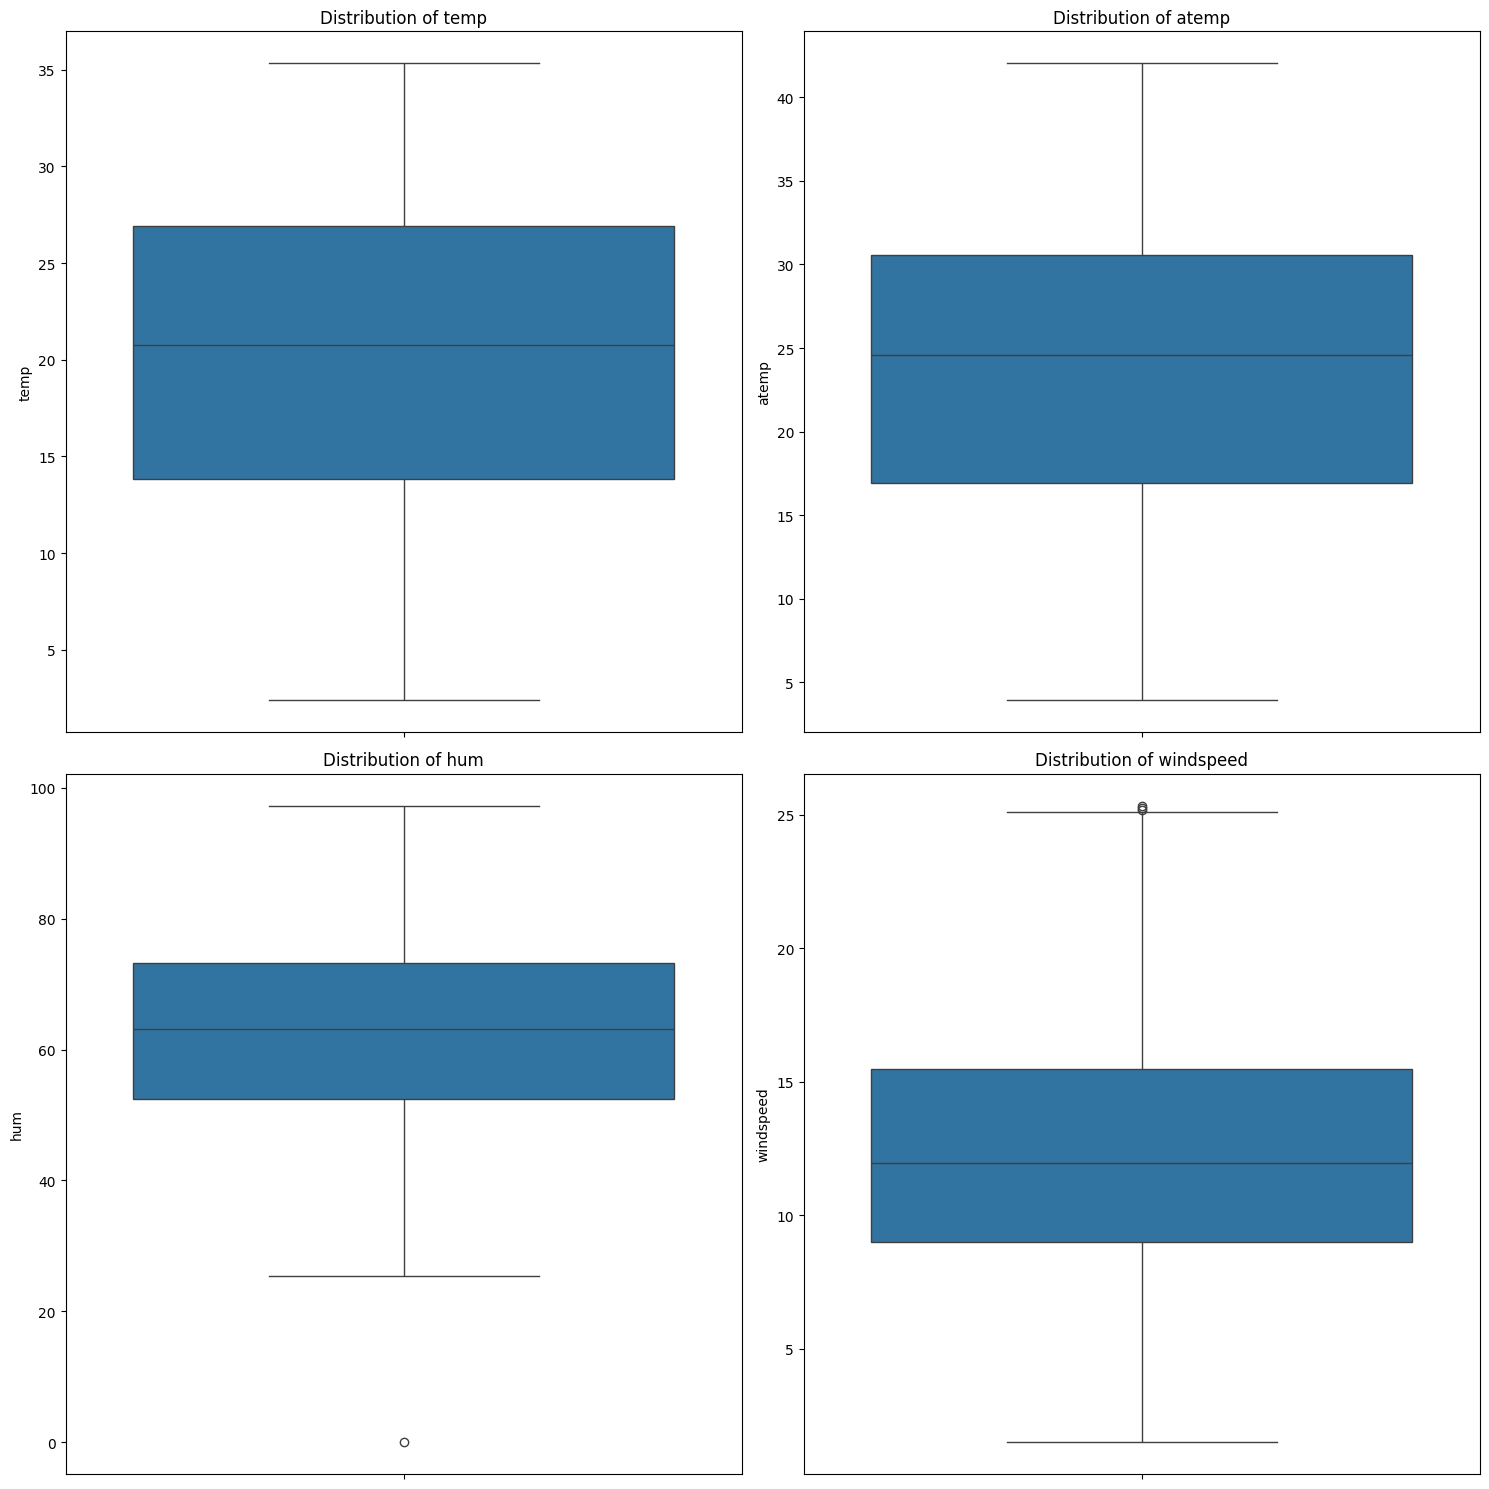

In [ ]:
# Distribution after removing outliers

num_vars=["temp","atemp","hum","windspeed"]

# Create subplots with 7 axes
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over categorical features and create histograms
for i, feature in enumerate(num_vars):
    sns.boxplot(bike[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#There is no outlier now

# Bivariate analysis

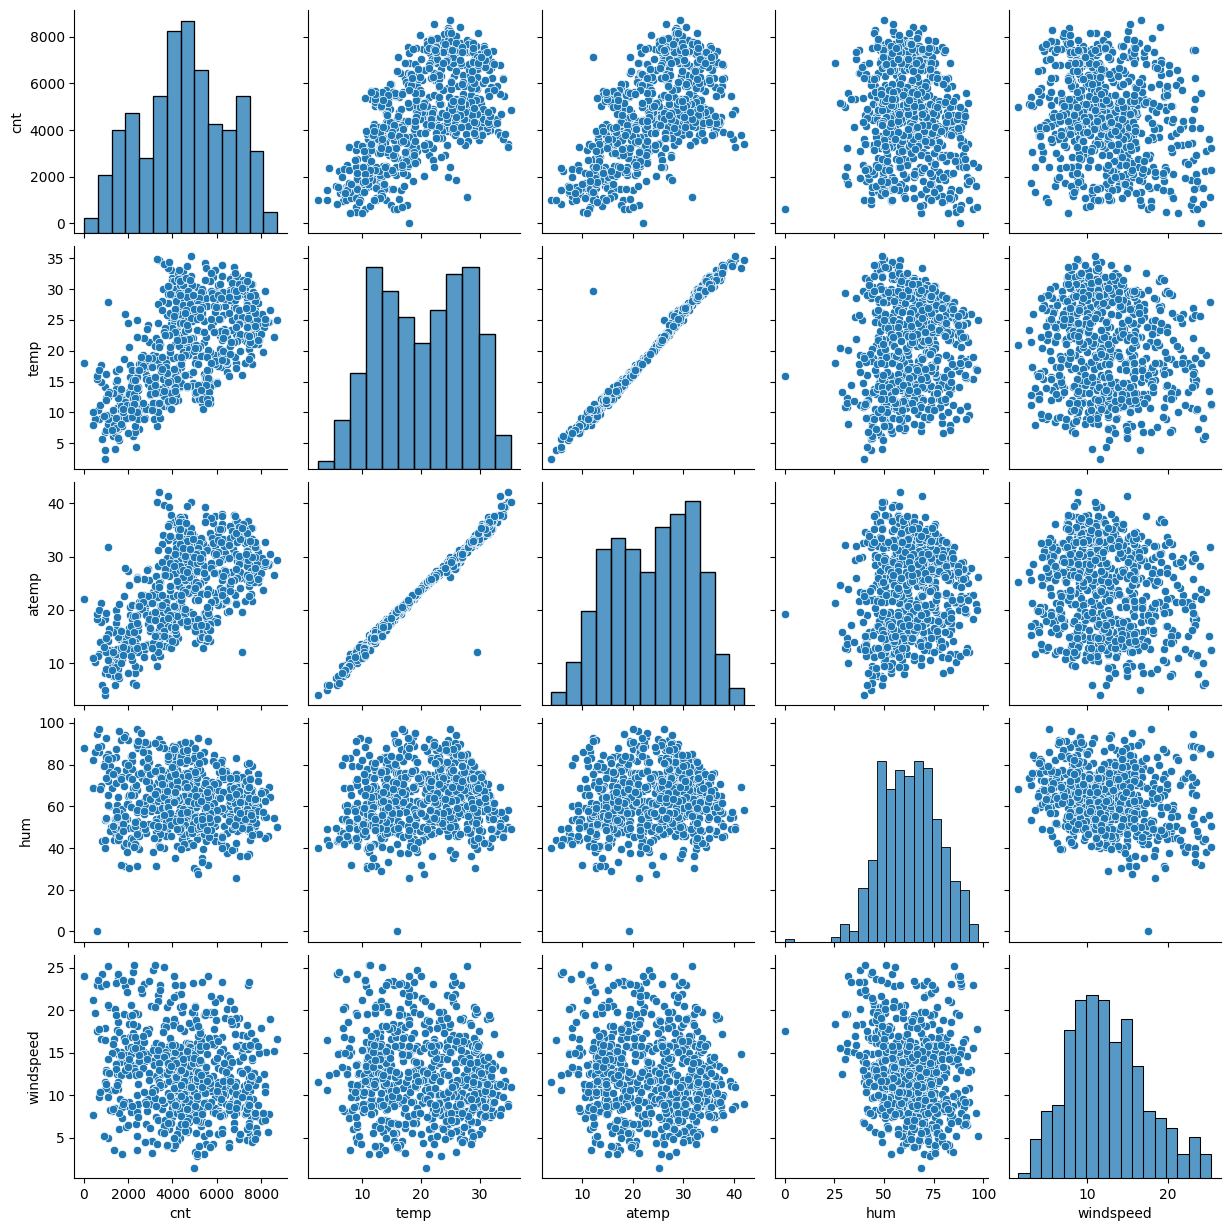

In [ ]:
# Pair Plot for numerical variables
num_vars=["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(bike[num_vars])
plt.show()

#cnt is very highly correlated with temp and atemp. Furthermore among the features atemp and temp are highly correlated

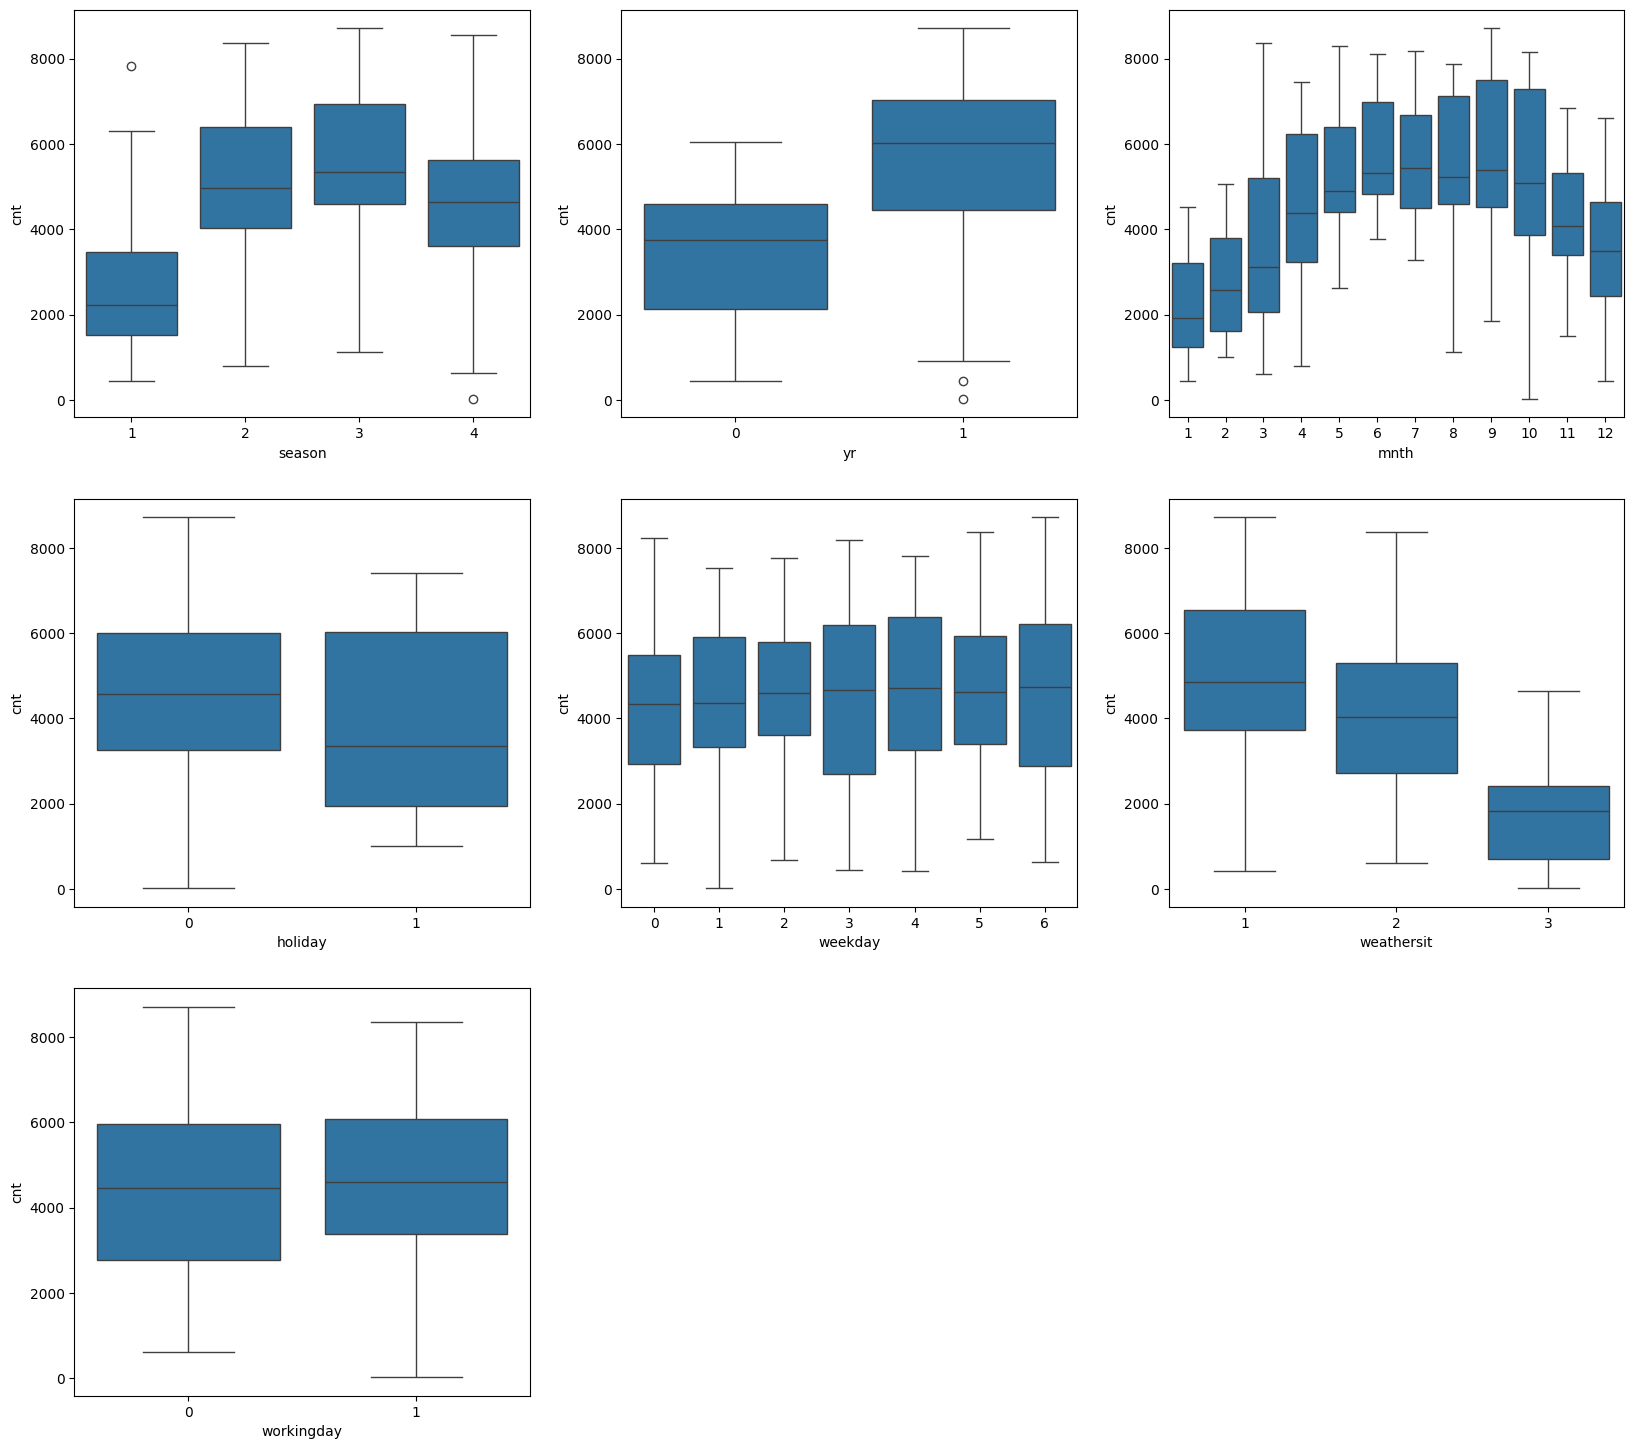

In [ ]:
# Comparison of boxplot for categorical features vis-a-vis 'cnt'

# Set the color palette
palette = sns.color_palette("Set2")


# Box Plots for categorical variables
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.show()

# For seasons the value 3 has the highest median cnt
# For yr the value 1 has the highest median cnt
# Among months july seems to have the highest median
# median cnt is higher for non-holidays
# For weathersit the category 1 has the highest median cnt
# Working day seems to have the same impact on median cnt

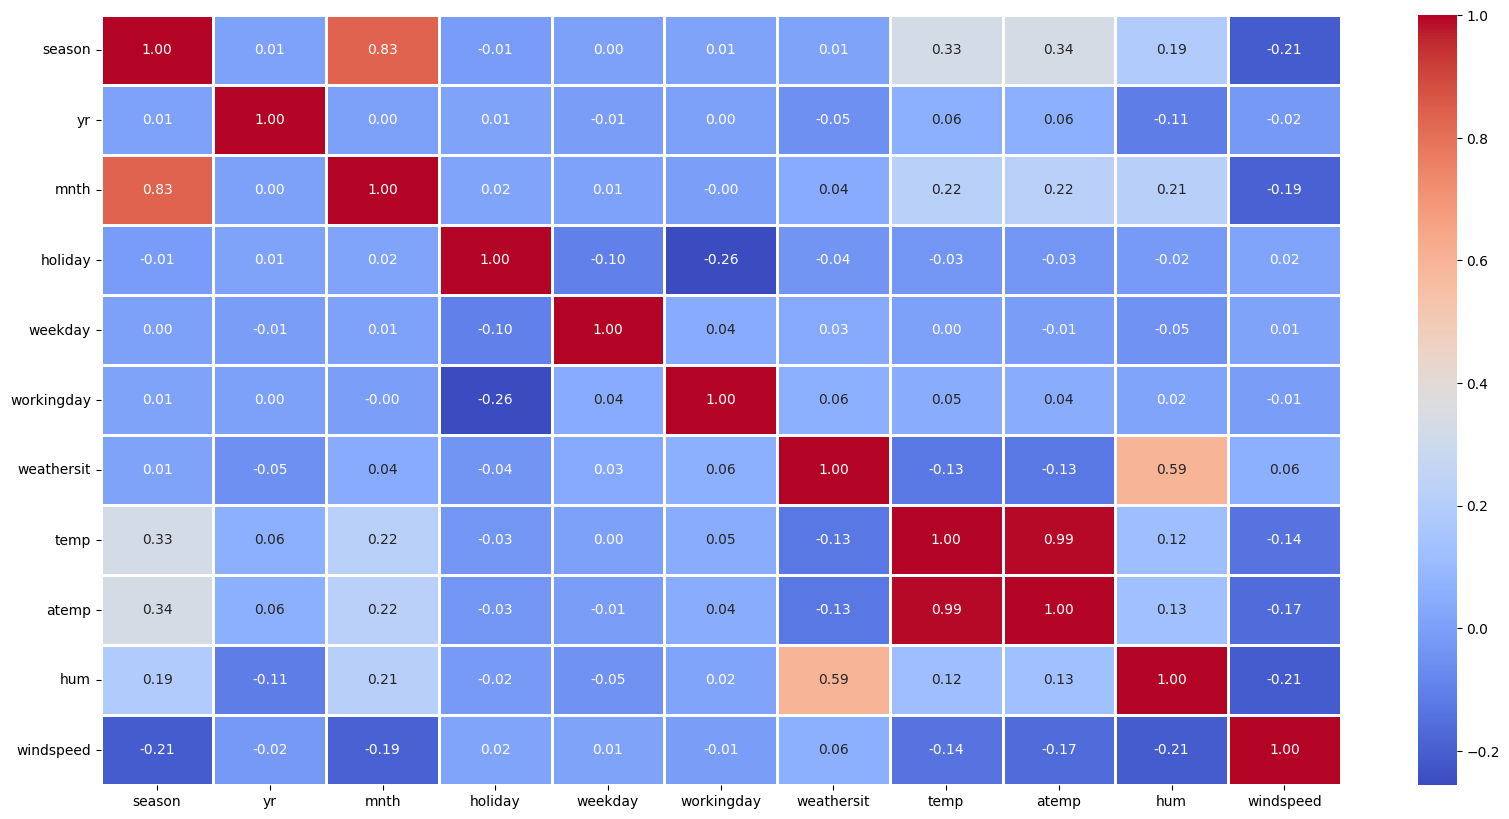

In [ ]:
# cnt is the target variable
X = bike.drop(['cnt'], axis=1)  # Features
y = bike['cnt']  # Target variable

# checking corelations among the variables using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

# temp and atem are very highly correlated

In [ ]:
# Now we will convert all non binary categorical columns to their original values one by one
#so that we can create dummy variables.
Labels=['season', 'mnth', 'weekday', 'weathersit']
for label in Labels:
    print(bike[label].value_counts())


season
3    188
2    181
4    176
1    172
Name: count, dtype: int64
mnth
5     62
7     62
8     62
1     61
12    61
6     60
9     60
10    60
11    60
3     59
4     58
2     52
Name: count, dtype: int64
weekday
0    103
2    103
5    103
6    102
1    102
3    102
4    102
Name: count, dtype: int64
weathersit
1    453
2    243
3     21
Name: count, dtype: int64


In [ ]:
# Mapping the Nos to their Orginal Values
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.mnth=bike.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday=bike.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})
bike.weathersit=bike.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})


# Create dummy variables and concatenate them with the original DataFrame
season_dummies = pd.get_dummies(bike.season, prefix='season', drop_first=True, dtype=int)
mnth_dummies = pd.get_dummies(bike.mnth, prefix='mnth', drop_first=True, dtype=int)
weekday_dummies = pd.get_dummies(bike.weekday, prefix='weekday', drop_first=True, dtype=int)
weathersit_dummies = pd.get_dummies(bike.weathersit, prefix='weathersit', drop_first=True, dtype=int)

bike = pd.concat([bike, season_dummies, mnth_dummies, weekday_dummies, weathersit_dummies], axis=1)

# Remove the original columns for which dummy variables have been created
bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)


In [ ]:
len(list(bike.columns))

30

In [ ]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_misty'],
      dtype='object')

In [ ]:
# Assuming 'cnt' is your target variable
X = bike.drop('cnt',axis=1)  # Features
y = bike['cnt']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

# Create the column transformer
ct = ColumnTransformer(
    [('scaler', MinMaxScaler(), numeric_features)], remainder='passthrough'
)

# Fit the scaler on the training data and transform it
X_train_scaled = ct.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = ct.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
print(len(list(X_train_scaled.columns)))
print(len(list(X_test_scaled.columns)))

29
29


In [ ]:
from sklearn.feature_selection import RFE

# Creating RFE and setting the feature value to 29
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select=29)
rfe = rfe.fit(X_train_scaled, y_train) #fitting the object on our train dataset




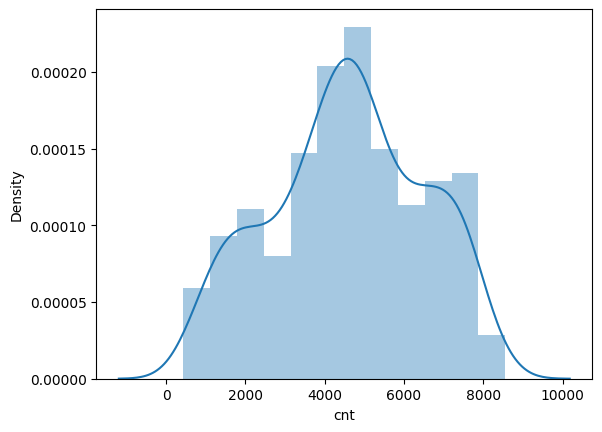

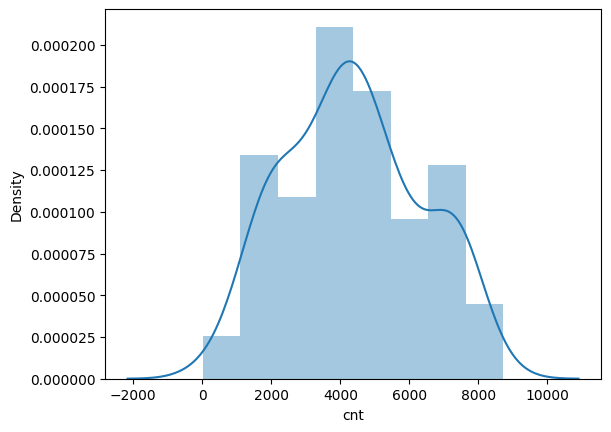

In [ ]:
sns.distplot(y_train)
plt.show()
sns.distplot(y_test)
plt.show()

In [ ]:
# Cheking the ranking and support for the variables
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thurs', True, 1),
 ('weekday_tues', True, 1),
 ('weekday_wed', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_misty', True, 1)]

In [ ]:
#Assigning a varaible to the support columns
rfe_col=X_train_scaled.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_misty'],
      dtype='object')

In [ ]:
# Checking the unsupported columns
X_train_scaled.columns[~rfe.support_]


Index([], dtype='object')

In [ ]:
#Creating RFE variables with selected variables
X_train_rfe=X_train_scaled[rfe_col]

In [ ]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_cloudy,weathersit_misty
0,1.0,0.433803,0.421419,0.901146,0.751426,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.897201,0.867429,0.599828,0.438797,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.483928,0.480414,0.935733,0.325153,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.818284,0.754729,0.518424,0.781497,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.204785,0.204058,0.634403,0.301938,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Resetting the indices of both dataframes to ensure alignment
y_train = y_train.reset_index(drop=True)
X_train_rfe = X_train_rfe.reset_index(drop=True)

lr = sm.OLS(y_train, X_train_rfe).fit()



In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.37e-203
Time:                        11:51:23   Log-Likelihood:                -4604.8
No. Observations:                 573   AIC:                             9268.
Df Residuals:                     544   BIC:                             9394.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2296.7247    289.564      7.932      0.000    1727.924    2865.525
yr                 3123.3960   1178.753      2.650      0.008     807.931    5438.861
holiday             672.9704   1160.260      0.580      0.562   -1606.168    2952.109
workingday        -1502.3962    322.061     -4.665      0.000   -2135.031    -869.761
temp               -898.1059    174.971     -5.133      0.000   -1241.807    -554.405
atemp              2023.6860     66.492     30.435      0.000    1893.073    2154.299
hum                 154.0095    176.919      0.871      0.384    -193.519     501.538
windspeed           833.5761     99.661      8.364      0.000     637.809    1029.343
season_spring      -931.8129    245.520     -3.795      0.000   -1414.097    -449.529
season_summer       162.6686    210.790      0.772      0.441    -251.393     576.730
season_winter       702.3479    219.702      3.197      0.001     270.780    1133.916
mnth_aug             67.8168    272.994      0.248      0.804    -468.435     604.068
mnth_dec           -354.5144    278.202     -1.274      0.203    -900.996     191.967
mnth_feb              1.5715    278.746      0.006      0.996    -545.978     549.121
mnth_jan           -165.1906    283.784     -0.582      0.561    -722.637     392.255
mnth_jul           -415.6737    276.142     -1.505      0.133    -958.109     126.761
mnth_jun             72.9682    195.658      0.373      0.709    -311.369     457.305
mnth_mar            310.1829    212.685      1.458      0.145    -107.601     727.967
mnth_may            290.5933    166.477      1.746      0.081     -36.423     617.610
mnth_nov           -392.1010    298.032     -1.316      0.189    -977.536     193.334
mnth_oct            324.4255    292.466      1.109      0.268    -250.075     898.926
mnth_sep            612.2016    257.979      2.373      0.018     105.444    1118.959
weekday_mon         461.0906    110.846      4.160      0.000     243.352     678.829
weekday_sat          26.5730    120.217      0.221      0.825    -209.572     262.719
weekday_sun         848.0485    109.155      7.769      0.000     633.632    1062.465
weekday_thurs        -8.4849    120.988     -0.070      0.944    -246.145     229.175
weekday_tues        -37.3570    127.955     -0.292      0.770    -288.704     213.990
weekday_wed        -134.5574    123.607     -1.089      0.277    -377.362     108.247
weathersit_cloudy -1866.8969    221.790     -8.417      0.000   -2302.567   -1431.226
weathersit_misty   -466.1025     88.143     -5.288      0.000    -639.244    -292.961
==============================================================================
Omnibus:                       82.553   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.144
Skew:   

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_sun,inf
22,weekday_mon,inf
6,hum,inf
7,windspeed,inf
1,yr,70.78
2,holiday,60.26
8,season_spring,10.50
10,season_winter,8.67
9,season_summer,8.20
19,mnth_nov,6.76


In [ ]:
# we drop 'mnth_feb' as this has highest p-value. The alternative approach could have been to start dropping variables with high vif
# but we drop variables one by one starting with the one which has the highest p-value

X_train_rfe=X_train_rfe.drop('mnth_feb',axis=1)

In [ ]:
# We run the model again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the linear regression summary for the next step
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.13e-204
Time:                        11:51:23   Log-Likelihood:                -4604.8
No. Observations:                 573   AIC:                             9266.
Df Residuals:                     545   BIC:                             9387.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2297.3590    266.571      8.618      0.000    1773.727    2820.991
yr                 3122.7899   1172.764      2.663      0.008     819.099    5426.480
holiday             672.9928   1159.188      0.581      0.562   -1604.031    2950.017
workingday        -1502.2078    320.028     -4.694      0.000   -2130.847    -873.569
temp               -898.1612    174.535     -5.146      0.000   -1241.006    -555.317
atemp              2023.7165     66.210     30.565      0.000    1893.658    2153.775
hum                 154.1843    174.022      0.886      0.376    -187.652     496.021
windspeed           833.7557     94.344      8.837      0.000     648.433    1019.079
season_spring      -931.2457    223.757     -4.162      0.000   -1370.777    -491.714
season_summer       162.3311    201.928      0.804      0.422    -234.322     558.984
season_winter       702.6471    213.003      3.299      0.001     284.239    1121.055
mnth_aug             67.3848    261.782      0.257      0.797    -446.840     581.609
mnth_dec           -355.6267    195.960     -1.815      0.070    -740.556      29.303
mnth_jan           -166.5087    160.705     -1.036      0.301    -482.186     149.168
mnth_jul           -416.0563    267.427     -1.556      0.120    -941.370     109.258
mnth_jun             72.7553    191.804      0.379      0.705    -304.010     449.521
mnth_mar            309.3045    144.650      2.138      0.033      25.164     593.445
mnth_may            290.4108    163.150      1.780      0.076     -30.069     610.891
mnth_nov           -393.0654    243.831     -1.612      0.108    -872.029      85.898
mnth_oct            323.5265    244.945      1.321      0.187    -157.625     804.678
mnth_sep            611.6204    236.273      2.589      0.010     147.503    1075.738
weekday_mon         461.2334    107.812      4.278      0.000     249.455     673.012
weekday_sat          26.5374    119.940      0.221      0.825    -209.065     262.139
weekday_sun         848.1856    106.316      7.978      0.000     639.346    1057.025
weekday_thurs        -8.4883    120.875     -0.070      0.944    -245.927     228.950
weekday_tues        -37.3911    127.695     -0.293      0.770    -288.225     213.443
weekday_wed        -134.5804    123.426     -1.090      0.276    -377.029     107.868
weathersit_cloudy -1866.9338    221.490     -8.429      0.000   -2302.013   -1431.855
weathersit_misty   -466.1123     88.044     -5.294      0.000    -639.060    -293.164
==============================================================================
Omnibus:                       82.563   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.174
Skew:                          -0.709   Prob(JB):                     1.04e-50
Kurtosis:      

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_mon,inf
23,weekday_sun,inf
6,hum,inf
7,windspeed,inf
1,yr,70.19
2,holiday,60.26
8,season_spring,8.74
10,season_winter,8.16
9,season_summer,7.54
14,mnth_jul,6.05


In [ ]:
# We now drop weekday_thurs since this has the highest p-value
X_train_rfe=X_train_rfe.drop('weekday_thurs',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we examine the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     118.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.85e-205
Time:                        11:51:24   Log-Likelihood:                -4604.8
No. Observations:                 573   AIC:                             9264.
Df Residuals:                     546   BIC:                             9381.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2296.8921    266.245      8.627      0.000    1773.902    2819.882
yr                 3120.5385   1171.257      2.664      0.008     819.818    5421.259
holiday             674.9000   1157.814      0.583      0.560   -1599.415    2949.215
workingday        -1503.4662    319.234     -4.710      0.000   -2130.544    -876.388
temp               -898.1030    174.374     -5.150      0.000   -1240.630    -555.576
atemp              2023.5472     66.106     30.611      0.000    1893.694    2153.400
hum                 152.1218    171.370      0.888      0.375    -184.503     488.746
windspeed           831.4121     88.164      9.430      0.000     658.230    1004.594
season_spring      -931.9130    223.351     -4.172      0.000   -1370.646    -493.180
season_summer       161.6894    201.537      0.802      0.423    -234.194     557.573
season_winter       702.6180    212.809      3.302      0.001     284.594    1120.642
mnth_aug             67.0120    261.489      0.256      0.798    -446.636     580.660
mnth_dec           -356.0317    195.697     -1.819      0.069    -740.442      28.379
mnth_jan           -166.4626    160.557     -1.037      0.300    -481.848     148.923
mnth_jul           -416.2209    267.173     -1.558      0.120    -941.034     108.592
mnth_jun             72.4090    191.566      0.378      0.706    -303.887     448.705
mnth_mar            309.6831    144.418      2.144      0.032      26.000     593.366
mnth_may            290.6031    162.978      1.783      0.075     -29.538     610.745
mnth_nov           -393.4879    243.534     -1.616      0.107    -871.867      84.891
mnth_oct            322.8983    244.558      1.320      0.187    -157.492     803.288
mnth_sep            611.3555    236.028      2.590      0.010     147.722    1074.989
weekday_mon         463.2048    103.998      4.454      0.000     258.919     667.491
weekday_sat          30.8478    102.950      0.300      0.765    -171.378     233.074
weekday_sun         850.1533    102.463      8.297      0.000     648.882    1051.424
weekday_tues        -33.0735    111.816     -0.296      0.768    -252.716     186.569
weekday_wed        -130.2478    106.801     -1.220      0.223    -340.040      79.544
weathersit_cloudy -1867.3693    221.201     -8.442      0.000   -2301.879   -1432.859
weathersit_misty   -465.8291     87.872     -5.301      0.000    -638.437    -293.221
==============================================================================
Omnibus:                       82.492   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.722
Skew:                          -0.709   Prob(JB):                     1.31e-50
Kurtosis:                       5.759   Cond. No.                     4.13e+15
======================

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weekday_sun,inf
21,weekday_mon,inf
6,hum,inf
7,windspeed,inf
1,yr,70.14
2,holiday,60.22
8,season_spring,8.72
10,season_winter,8.16
9,season_summer,7.53
14,mnth_jul,6.05


In [ ]:
# we now drop the feature mnth_aug as this has the highest p-value

X_train_rfe=X_train_rfe.drop('mnth_aug',axis=1)

In [ ]:
# We run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary below
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.63e-206
Time:                        11:51:24   Log-Likelihood:                -4604.8
No. Observations:                 573   AIC:                             9262.
Df Residuals:                     547   BIC:                             9375.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2320.0853    250.177      9.274      0.000    1828.660    2811.511
yr                 3192.2553   1136.362      2.809      0.005     960.088    5424.422
holiday             634.3053   1145.946      0.554      0.580   -1616.689    2885.300
workingday        -1504.1519    318.950     -4.716      0.000   -2130.669    -877.634
temp               -900.7986    173.908     -5.180      0.000   -1242.408    -559.189
atemp              2022.7504     65.976     30.659      0.000    1893.153    2152.348
hum                 156.5262    170.360      0.919      0.359    -178.114     491.166
windspeed           837.0372     85.315      9.811      0.000     669.452    1004.622
season_spring      -964.9777    182.159     -5.297      0.000   -1322.795    -607.160
season_summer       126.7032    148.128      0.855      0.393    -164.266     417.673
season_winter       684.3249    200.308      3.416      0.001     290.857    1077.793
mnth_dec           -369.8819    187.925     -1.968      0.050    -739.025      -0.739
mnth_jan           -167.8655    160.327     -1.047      0.296    -482.797     147.066
mnth_jul           -472.6890    150.964     -3.131      0.002    -769.230    -176.148
mnth_jun             41.9734    150.180      0.279      0.780    -253.027     336.974
mnth_mar            302.5440    141.584      2.137      0.033      24.428     580.660
mnth_may            276.2907    152.980      1.806      0.071     -24.209     576.791
mnth_nov           -414.8409    228.642     -1.814      0.070    -863.964      34.282
mnth_oct            296.7186    222.010      1.337      0.182    -139.378     732.815
mnth_sep            565.0984    151.950      3.719      0.000     266.621     863.576
weekday_mon         470.1112    100.360      4.684      0.000     272.973     667.250
weekday_sat          31.0892    102.858      0.302      0.763    -170.955     233.133
weekday_sun         856.4107     99.427      8.613      0.000     661.106    1051.716
weekday_tues        -32.9610    111.720     -0.295      0.768    -252.413     186.491
weekday_wed        -129.8819    106.700     -1.217      0.224    -339.475      79.711
weathersit_cloudy -1867.3115    221.012     -8.449      0.000   -2301.448   -1433.175
weathersit_misty   -465.2583     87.768     -5.301      0.000    -637.663    -292.854
==============================================================================
Omnibus:                       82.093   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.627
Skew:                          -0.707   Prob(JB):                     3.73e-50
Kurtosis:                       5.745   Cond. No.                     4.11e+15
==============================================================================

Notes:
[1] Standard Errors a

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,weekday_sun,inf
20,weekday_mon,inf
6,hum,inf
7,windspeed,inf
1,yr,66.14
2,holiday,59.10
10,season_winter,7.24
8,season_spring,5.81
9,season_summer,4.07
17,mnth_nov,4.00


In [ ]:
# we drop mnth_jun now since this has the highest
X_train_rfe=X_train_rfe.drop('mnth_jun',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary below
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.38e-207
Time:                        11:51:24   Log-Likelihood:                -4604.8
No. Observations:                 573   AIC:                             9260.
Df Residuals:                     548   BIC:                             9368.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2311.3805    248.022      9.319      0.000    1824.191    2798.570
yr                 3244.4601   1119.962      2.897      0.004    1044.517    5444.404
holiday             619.1372   1143.697      0.541      0.588   -1627.430    2865.705
workingday        -1515.6534    316.018     -4.796      0.000   -2136.409    -894.898
temp               -905.1004    173.080     -5.229      0.000   -1245.082    -565.119
atemp              2020.7623     65.536     30.834      0.000    1892.029    2149.496
hum                 151.5162    169.272      0.895      0.371    -180.985     484.017
windspeed           834.8185     84.873      9.836      0.000     668.101    1001.536
season_spring      -956.6146    179.534     -5.328      0.000   -1309.273    -603.956
season_summer       139.3108    140.973      0.988      0.323    -137.604     416.225
season_winter       688.4790    199.588      3.449      0.001     296.428    1080.530
mnth_dec           -367.6268    187.594     -1.960      0.051    -736.118       0.864
mnth_jan           -165.0621    159.878     -1.032      0.302    -479.111     148.987
mnth_jul           -486.2409    142.845     -3.404      0.001    -766.832    -205.650
mnth_mar            296.4937    139.802      2.121      0.034      21.880     571.107
mnth_may            259.0375    139.854      1.852      0.065     -15.678     533.753
mnth_nov           -413.6179    228.407     -1.811      0.071    -862.279      35.043
mnth_oct            292.8536    221.392      1.323      0.186    -142.028     727.735
mnth_sep            558.0800    149.735      3.727      0.000     263.955     852.205
weekday_mon         469.2287    100.226      4.682      0.000     272.354     666.103
weekday_sat          31.8489    102.735      0.310      0.757    -169.954     233.652
weekday_sun         855.8170     99.320      8.617      0.000     660.722    1050.912
weekday_tues        -30.9526    111.395     -0.278      0.781    -249.765     187.860
weekday_wed        -128.8022    106.541     -1.209      0.227    -338.081      80.476
weathersit_cloudy -1864.2172    220.549     -8.453      0.000   -2297.442   -1430.992
weathersit_misty   -463.8573     87.551     -5.298      0.000    -635.835    -291.880
==============================================================================
Omnibus:                       81.264   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.720
Skew:                          -0.702   Prob(JB):                     2.63e-49
Kurtosis:                       5.720   Cond. No.                     4.11e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_sun,inf
19,weekday_mon,inf
6,hum,inf
7,windspeed,inf
1,yr,64.35
2,holiday,58.96
10,season_winter,7.20
8,season_spring,5.66
16,mnth_nov,4.00
17,mnth_oct,3.82


In [ ]:
# we now drop weekday_tues now

X_train_rfe=X_train_rfe.drop('weekday_tues',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary below
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.11e-208
Time:                        11:51:25   Log-Likelihood:                -4604.9
No. Observations:                 573   AIC:                             9258.
Df Residuals:                     549   BIC:                             9362.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2306.9711    247.306      9.328      0.000    1821.190    2792.752
yr                 3259.6383   1117.688      2.916      0.004    1064.169    5455.107
holiday             605.2380   1141.642      0.530      0.596   -1637.284    2847.760
workingday        -1520.9865    315.170     -4.826      0.000   -2140.073    -901.901
temp               -905.9459    172.908     -5.239      0.000   -1245.587    -566.304
atemp              2020.3554     65.465     30.862      0.000    1891.763    2148.948
hum                 135.8922    159.526      0.852      0.395    -177.463     449.247
windspeed           832.6397     84.439      9.861      0.000     666.776     998.503
season_spring      -956.7314    179.382     -5.333      0.000   -1309.091    -604.372
season_summer       139.5200    140.853      0.991      0.322    -137.157     416.197
season_winter       689.6206    199.378      3.459      0.001     297.983    1081.258
mnth_dec           -367.6749    187.436     -1.962      0.050    -735.855       0.505
mnth_jan           -164.2701    159.718     -1.028      0.304    -478.004     149.463
mnth_jul           -487.2837    142.676     -3.415      0.001    -767.541    -207.026
mnth_mar            297.9263    139.589      2.134      0.033      23.731     572.121
mnth_may            259.5470    139.724      1.858      0.064     -14.913     534.007
mnth_nov           -414.3533    228.200     -1.816      0.070    -862.605      33.899
mnth_oct            291.4228    221.146      1.318      0.188    -142.974     725.819
mnth_sep            559.3167    149.543      3.740      0.000     265.570     853.063
weekday_mon         476.0644     97.078      4.904      0.000     285.374     666.755
weekday_sat          40.9685     97.270      0.421      0.674    -150.098     232.035
weekday_sun         862.3748     96.394      8.946      0.000     673.028    1051.722
weekday_wed        -119.8366    101.452     -1.181      0.238    -319.118      79.445
weathersit_cloudy -1859.0997    219.594     -8.466      0.000   -2290.447   -1427.752
weathersit_misty   -463.0654     87.432     -5.296      0.000    -634.807    -291.324
==============================================================================
Omnibus:                       80.707   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.412
Skew:                          -0.699   Prob(JB):                     8.34e-49
Kurtosis:                       5.706   Cond. No.                     4.09e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-28. This might indicate that there are
strong multicollinearity 

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_sun,inf
19,weekday_mon,inf
6,hum,inf
7,windspeed,inf
1,yr,64.20
2,holiday,58.85
10,season_winter,7.20
8,season_spring,5.66
16,mnth_nov,4.00
17,mnth_oct,3.82


In [ ]:
# we now drop weekday_sat now

X_train_rfe=X_train_rfe.drop('weekday_sat',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary below
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     140.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.92e-209
Time:                        11:51:25   Log-Likelihood:                -4605.0
No. Observations:                 573   AIC:                             9256.
Df Residuals:                     550   BIC:                             9356.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2311.6204    246.874      9.364      0.000    1826.689    2796.552
yr                 3295.2145   1113.658      2.959      0.003    1107.670    5482.759
holiday             568.0640   1137.374      0.499      0.618   -1666.064    2802.192
workingday        -1525.9520    314.713     -4.849      0.000   -2144.139    -907.765
temp               -905.8907    172.778     -5.243      0.000   -1245.277    -566.505
atemp              2020.0985     65.413     30.882      0.000    1891.608    2148.589
hum                 137.4831    159.362      0.863      0.389    -175.549     450.515
windspeed           841.1208     81.942     10.265      0.000     680.163    1002.078
season_spring      -956.3707    179.246     -5.336      0.000   -1308.461    -604.280
season_summer       140.7642    140.717      1.000      0.318    -135.644     417.172
season_winter       690.3140    199.222      3.465      0.001     298.985    1081.643
mnth_dec           -366.7689    187.284     -1.958      0.051    -734.647       1.110
mnth_jan           -163.7573    159.594     -1.026      0.305    -477.246     149.731
mnth_jul           -485.9657    142.535     -3.409      0.001    -765.945    -205.987
mnth_mar            297.7140    139.484      2.134      0.033      23.727     571.701
mnth_may            259.1095    139.616      1.856      0.064     -15.136     533.355
mnth_nov           -412.6364    227.993     -1.810      0.071    -860.480      35.207
mnth_oct            292.5219    220.966      1.324      0.186    -141.518     726.562
mnth_sep            560.9096    149.383      3.755      0.000     267.478     854.341
weekday_mon         473.3915     96.798      4.891      0.000     283.252     663.531
weekday_sun         859.6250     96.101      8.945      0.000     670.855    1048.395
weekday_wed        -130.8875     97.927     -1.337      0.182    -323.245      61.470
weathersit_cloudy -1865.7538    218.861     -8.525      0.000   -2295.660   -1435.848
weathersit_misty   -461.9232     87.324     -5.290      0.000    -633.453    -290.394
==============================================================================
Omnibus:                       79.554   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.495
Skew:                          -0.690   Prob(JB):                     5.91e-48
Kurtosis:                       5.684   Cond. No.                     4.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weekday_sun,inf
19,weekday_mon,inf
6,hum,inf
7,windspeed,inf
1,yr,63.83
2,holiday,58.50
10,season_winter,7.20
8,season_spring,5.66
16,mnth_nov,3.99
17,mnth_oct,3.82


In [ ]:
# we now drop holiday

X_train_rfe=X_train_rfe.drop('holiday',axis=1)

In [ ]:
# we run the linear regression again

lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary below

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.76e-210
Time:                        11:51:25   Log-Likelihood:                -4605.1
No. Observations:                 573   AIC:                             9254.
Df Residuals:                     551   BIC:                             9350.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2309.2563    246.661      9.362      0.000    1824.746    2793.767
yr                 3830.8189    300.176     12.762      0.000    3241.190    4420.448
workingday        -1518.9310    314.185     -4.835      0.000   -2136.078    -901.784
temp               -921.3722    169.859     -5.424      0.000   -1255.023    -587.721
atemp              2019.1243     65.340     30.902      0.000    1890.779    2147.469
hum                 134.5756    159.147      0.846      0.398    -178.033     447.184
windspeed           840.6730     81.881     10.267      0.000     679.836    1001.511
season_spring      -945.2201    177.729     -5.318      0.000   -1294.330    -596.111
season_summer       153.7351    138.205      1.112      0.266    -117.738     425.208
season_winter       698.0266    198.487      3.517      0.000     308.142    1087.911
mnth_dec           -362.3703    186.949     -1.938      0.053    -729.590       4.849
mnth_jan           -166.2009    159.410     -1.043      0.298    -479.327     146.926
mnth_jul           -479.9778    141.933     -3.382      0.001    -758.773    -201.182
mnth_mar            298.7168    139.375      2.143      0.033      24.946     572.487
mnth_may            256.7508    139.441      1.841      0.066     -17.150     530.652
mnth_nov           -405.6780    227.412     -1.784      0.075    -852.378      41.022
mnth_oct            298.2074    220.522      1.352      0.177    -134.959     731.374
mnth_sep            564.0354    149.150      3.782      0.000     271.062     857.008
weekday_mon         474.4441     96.709      4.906      0.000     284.480     664.408
weekday_sun         859.5636     96.036      8.950      0.000     670.923    1048.204
weekday_wed        -130.1050     97.848     -1.330      0.184    -322.306      62.096
weathersit_cloudy -1875.5792    217.827     -8.610      0.000   -2303.451   -1447.707
weathersit_misty   -463.0274     87.237     -5.308      0.000    -634.384    -291.670
==============================================================================
Omnibus:                       79.796   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.109
Skew:                          -0.691   Prob(JB):                     2.64e-48
Kurtosis:                       5.696   Cond. No.                     3.75e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weekday_sun,inf
18,weekday_mon,inf
5,hum,inf
6,windspeed,inf
9,season_winter,7.16
7,season_spring,5.57
1,yr,4.64
15,mnth_nov,3.98
16,mnth_oct,3.81
8,season_summer,3.57


In [ ]:
# we now drop humidity

X_train_rfe=X_train_rfe.drop('hum',axis=1)

In [ ]:
# we run the linear regression again

lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.76e-210
Time:                        11:51:25   Log-Likelihood:                -4605.1
No. Observations:                 573   AIC:                             9254.
Df Residuals:                     551   BIC:                             9350.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2443.8319    357.540      6.835      0.000    1741.524    3146.140
yr                 3830.8189    300.176     12.762      0.000    3241.190    4420.448
workingday        -1518.9310    314.185     -4.835      0.000   -2136.078    -901.784
temp               -921.3722    169.859     -5.424      0.000   -1255.023    -587.721
atemp              2019.1243     65.340     30.902      0.000    1890.779    2147.469
windspeed           706.0974    182.758      3.864      0.000     347.109    1065.085
season_spring      -945.2201    177.729     -5.318      0.000   -1294.330    -596.111
season_summer       153.7351    138.205      1.112      0.266    -117.738     425.208
season_winter       698.0266    198.487      3.517      0.000     308.142    1087.911
mnth_dec           -362.3703    186.949     -1.938      0.053    -729.590       4.849
mnth_jan           -166.2009    159.410     -1.043      0.298    -479.327     146.926
mnth_jul           -479.9778    141.933     -3.382      0.001    -758.773    -201.182
mnth_mar            298.7168    139.375      2.143      0.033      24.946     572.487
mnth_may            256.7508    139.441      1.841      0.066     -17.150     530.652
mnth_nov           -405.6780    227.412     -1.784      0.075    -852.378      41.022
mnth_oct            298.2074    220.522      1.352      0.177    -134.959     731.374
mnth_sep            564.0354    149.150      3.782      0.000     271.062     857.008
weekday_mon         339.8685    196.255      1.732      0.084     -45.632     725.369
weekday_sun         724.9880    195.796      3.703      0.000     340.390    1109.586
weekday_wed        -130.1050     97.848     -1.330      0.184    -322.306      62.096
weathersit_cloudy -1875.5792    217.827     -8.610      0.000   -2303.451   -1447.707
weathersit_misty   -463.0274     87.237     -5.308      0.000    -634.384    -291.670
==============================================================================
Omnibus:                       79.796   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.109
Skew:                          -0.691   Prob(JB):                     2.64e-48
Kurtosis:                       5.696   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,125.77
5,windspeed,7.30
8,season_winter,7.16
6,season_spring,5.57
18,weekday_sun,4.86
17,weekday_mon,4.79
1,yr,4.64
14,mnth_nov,3.98
15,mnth_oct,3.81
7,season_summer,3.57


In [ ]:
# we now drop mnth_jan
X_train_rfe=X_train_rfe.drop('mnth_jan',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.40e-211
Time:                        11:51:26   Log-Likelihood:                -4605.7
No. Observations:                 573   AIC:                             9253.
Df Residuals:                     552   BIC:                             9345.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2369.2580    350.340      6.763      0.000    1681.096    3057.420
yr                 3929.1357    285.002     13.786      0.000    3369.315    4488.956
workingday        -1544.8236    313.227     -4.932      0.000   -2160.086    -929.561
temp               -921.3768    169.873     -5.424      0.000   -1255.053    -587.701
atemp              2017.7223     65.331     30.885      0.000    1889.395    2146.050
windspeed           714.9032    182.577      3.916      0.000     356.272    1073.535
season_spring      -973.7852    175.618     -5.545      0.000   -1318.747    -628.823
season_summer       170.4262    137.286      1.241      0.215     -99.240     440.092
season_winter       681.6922    197.884      3.445      0.001     292.995    1070.389
mnth_dec           -289.9879    173.594     -1.670      0.095    -630.973      50.997
mnth_jul           -483.6440    141.900     -3.408      0.001    -762.375    -204.913
mnth_mar            350.7742    130.134      2.695      0.007      95.155     606.393
mnth_may            258.5090    139.442      1.854      0.064     -15.392     532.410
mnth_nov           -344.8544    219.819     -1.569      0.117    -776.638      86.929
mnth_oct            346.6853    215.581      1.608      0.108     -76.774     770.145
mnth_sep            583.9830    147.930      3.948      0.000     293.409     874.557
weekday_mon         350.7059    195.995      1.789      0.074     -34.282     735.694
weekday_sun         731.1607    195.722      3.736      0.000     346.710    1115.612
weekday_wed        -131.1972     97.850     -1.341      0.181    -323.401      61.007
weathersit_cloudy -1866.7890    217.681     -8.576      0.000   -2294.373   -1439.205
weathersit_misty   -460.5259     87.210     -5.281      0.000    -631.831    -289.221
==============================================================================
Omnibus:                       79.116   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.072
Skew:                          -0.691   Prob(JB):                     5.39e-47
Kurtosis:                       5.648   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,120.73
5,windspeed,7.29
8,season_winter,7.11
6,season_spring,5.44
17,weekday_sun,4.85
16,weekday_mon,4.77
1,yr,4.19
13,mnth_nov,3.72
14,mnth_oct,3.64
7,season_summer,3.52


In [ ]:
# we now drop season_summer

X_train_rfe=X_train_rfe.drop('season_summer',axis=1)

In [ ]:
# we run the linear regression again

lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.98e-212
Time:                        11:51:26   Log-Likelihood:                -4606.5
No. Observations:                 573   AIC:                             9253.
Df Residuals:                     553   BIC:                             9340.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2557.6062    315.936      8.095      0.000    1937.024    3178.188
yr                 3781.2216    259.026     14.598      0.000    3272.426    4290.017
workingday        -1539.8319    313.354     -4.914      0.000   -2155.342    -924.322
temp               -902.5622    169.278     -5.332      0.000   -1235.068    -570.056
atemp              2022.9804     65.225     31.015      0.000    1894.861    2151.100
windspeed           707.9086    182.580      3.877      0.000     349.274    1066.543
season_spring     -1124.9017    126.646     -8.882      0.000   -1373.667    -876.136
season_winter       601.9481    187.259      3.215      0.001     234.123     969.773
mnth_dec           -329.4164    170.747     -1.929      0.054    -664.808       5.975
mnth_jul           -547.2884    132.380     -4.134      0.000    -807.317    -287.259
mnth_mar            376.7374    128.505      2.932      0.004     124.319     629.156
mnth_may            334.0530    125.524      2.661      0.008      87.492     580.615
mnth_nov           -401.4063    215.152     -1.866      0.063    -824.021      21.209
mnth_oct            311.8354    213.850      1.458      0.145    -108.222     731.893
mnth_sep            515.5550    137.344      3.754      0.000     245.776     785.334
weekday_mon         335.9508    195.730      1.716      0.087     -48.515     720.417
weekday_sun         719.4470    195.590      3.678      0.000     335.257    1103.637
weekday_wed        -133.5598     97.880     -1.365      0.173    -325.821      58.701
weathersit_cloudy -1870.2962    217.769     -8.588      0.000   -2298.051   -1442.541
weathersit_misty   -460.7739     87.253     -5.281      0.000    -632.162    -289.386
==============================================================================
Omnibus:                       78.388   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.629
Skew:                          -0.677   Prob(JB):                     9.11e-48
Kurtosis:                       5.691   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,98.09
5,windspeed,7.28
7,season_winter,6.36
16,weekday_sun,4.84
15,weekday_mon,4.76
13,mnth_oct,3.58
12,mnth_nov,3.56
1,yr,3.45
6,season_spring,2.82
8,mnth_dec,2.12


In [ ]:
# we now drop weekday_wed
X_train_rfe=X_train_rfe.drop('weekday_wed',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          7.55e-213
Time:                        11:51:26   Log-Likelihood:                -4607.4
No. Observations:                 573   AIC:                             9253.
Df Residuals:                     554   BIC:                             9336.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2559.8875    316.178      8.096      0.000    1938.834    3180.941
yr                 3770.8614    259.116     14.553      0.000    3261.891    4279.832
workingday        -1539.8726    313.598     -4.910      0.000   -2155.859    -923.886
temp               -902.5710    169.410     -5.328      0.000   -1235.335    -569.807
atemp              2020.8375     65.257     30.967      0.000    1892.656    2149.019
windspeed           688.9455    182.192      3.781      0.000     331.075    1046.816
season_spring     -1129.4186    126.701     -8.914      0.000   -1378.291    -880.546
season_winter       602.6614    187.404      3.216      0.001     234.553     970.770
mnth_dec           -327.6953    170.875     -1.918      0.056    -663.337       7.947
mnth_jul           -546.1170    132.480     -4.122      0.000    -806.342    -285.892
mnth_mar            368.9156    128.477      2.871      0.004     116.553     621.278
mnth_may            330.2150    125.590      2.629      0.009      83.525     576.905
mnth_nov           -405.6339    215.297     -1.884      0.060    -828.532      17.264
mnth_oct            307.1091    213.988      1.435      0.152    -113.218     727.436
mnth_sep            513.9327    137.445      3.739      0.000     243.955     783.910
weekday_mon         342.9028    195.816      1.751      0.080     -41.730     727.536
weekday_sun         726.7649    195.668      3.714      0.000     342.422    1111.108
weathersit_cloudy -1867.6179    217.929     -8.570      0.000   -2295.686   -1439.549
weathersit_misty   -461.5954     87.319     -5.286      0.000    -633.112    -290.079
==============================================================================
Omnibus:                       80.718   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.234
Skew:                          -0.683   Prob(JB):                     3.72e-51
Kurtosis:                       5.803   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,98.09
5,windspeed,7.24
7,season_winter,6.36
16,weekday_sun,4.84
15,weekday_mon,4.75
13,mnth_oct,3.58
12,mnth_nov,3.56
1,yr,3.45
6,season_spring,2.82
8,mnth_dec,2.12


In [ ]:
# we now drop mnth_oct
X_train_rfe=X_train_rfe.drop('mnth_oct',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# We present the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.54e-213
Time:                        11:51:26   Log-Likelihood:                -4608.5
No. Observations:                 573   AIC:                             9253.
Df Residuals:                     555   BIC:                             9331.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2560.7160    316.479      8.091      0.000    1939.073    3182.359
yr                 3787.8689    259.092     14.620      0.000    3278.948    4296.790
workingday        -1497.8879    312.528     -4.793      0.000   -2111.771    -884.005
temp               -902.0010    169.571     -5.319      0.000   -1235.080    -568.922
atemp              2020.8954     65.319     30.939      0.000    1892.592    2149.199
windspeed           664.6241    181.575      3.660      0.000     307.966    1021.282
season_spring     -1113.8557    126.356     -8.815      0.000   -1362.051    -865.660
season_winter       814.5584    115.526      7.051      0.000     587.637    1041.479
mnth_dec           -477.0860    135.639     -3.517      0.000    -743.515    -210.657
mnth_jul           -564.1698    132.007     -4.274      0.000    -823.465    -304.875
mnth_mar            349.8648    127.912      2.735      0.006      98.615     601.115
mnth_may            313.9210    125.195      2.507      0.012      68.007     559.835
mnth_nov           -630.5305    147.778     -4.267      0.000    -920.803    -340.258
mnth_sep            439.5689    127.426      3.450      0.001     189.273     689.864
weekday_mon         319.8892    195.345      1.638      0.102     -63.816     703.594
weekday_sun         707.5328    195.395      3.621      0.000     323.728    1091.337
weathersit_cloudy -1844.5419    217.543     -8.479      0.000   -2271.849   -1417.234
weathersit_misty   -468.6592     87.263     -5.371      0.000    -640.065    -297.253
==============================================================================
Omnibus:                       76.474   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.786
Skew:                          -0.653   Prob(JB):                     1.39e-47
Kurtosis:                       5.707   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,98.09
5,windspeed,7.17
15,weekday_sun,4.81
14,weekday_mon,4.72
1,yr,3.44
6,season_spring,2.80
7,season_winter,2.41
2,workingday,1.99
12,mnth_nov,1.67
17,weathersit_misty,1.63


In [ ]:
# we now drop weekday_mon
X_train_rfe=X_train_rfe.drop('weekday_mon',axis=1)

In [ ]:
# we run the linear regression again
lr=sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
# we present the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.13e-214
Time:                        11:51:26   Log-Likelihood:                -4609.9
No. Observations:                 573   AIC:                             9254.
Df Residuals:                     556   BIC:                             9328.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2831.0805    270.409     10.470      0.000    2299.933    3362.228
yr                 3778.3653    259.418     14.565      0.000    3268.805    4287.925
workingday        -1491.7928    312.978     -4.766      0.000   -2106.557    -877.028
temp               -904.9624    169.817     -5.329      0.000   -1238.524    -571.400
atemp              2018.3781     65.400     30.862      0.000    1889.917    2146.839
windspeed           402.3615     85.686      4.696      0.000     234.053     570.670
season_spring     -1124.5386    126.379     -8.898      0.000   -1372.776    -876.301
season_winter       813.5149    115.698      7.031      0.000     586.255    1040.774
mnth_dec           -479.9611    135.833     -3.533      0.000    -746.769    -213.153
mnth_jul           -564.0854    132.207     -4.267      0.000    -823.771    -304.399
mnth_mar            360.0866    127.952      2.814      0.005     108.758     611.416
mnth_may            314.9842    125.382      2.512      0.012      68.703     561.265
mnth_nov           -648.2251    147.605     -4.392      0.000    -938.156    -358.294
mnth_sep            435.4007    127.593      3.412      0.001     184.778     686.024
weekday_sun         445.2129    112.056      3.973      0.000     225.108     665.318
weathersit_cloudy -1841.5558    217.864     -8.453      0.000   -2269.492   -1413.619
weathersit_misty   -469.9609     87.391     -5.378      0.000    -641.618    -298.303
==============================================================================
Omnibus:                       79.553   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.622
Skew:                          -0.684   Prob(JB):                     7.51e-49
Kurtosis:                       5.722   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
test = X_train_rfe
vif['Features'] = test.columns
vif['VIF'] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.39
1,yr,3.44
6,season_spring,2.79
7,season_winter,2.41
2,workingday,1.99
12,mnth_nov,1.66
16,weathersit_misty,1.63
5,windspeed,1.59
14,weekday_sun,1.58
9,mnth_jul,1.48


In [ ]:
# final selected features in the model are
print(X_train_rfe.columns)

Index(['const', 'yr', 'workingday', 'temp', 'atemp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_misty'],
      dtype='object')


Index(['const', 'yr', 'workingday', 'temp', 'atemp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_misty'],
      dtype='object')
Index(['const', 'yr', 'workingday', 'temp', 'atemp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sun', 'weathersit_cloudy',
       'weathersit_misty'],
      dtype='object')


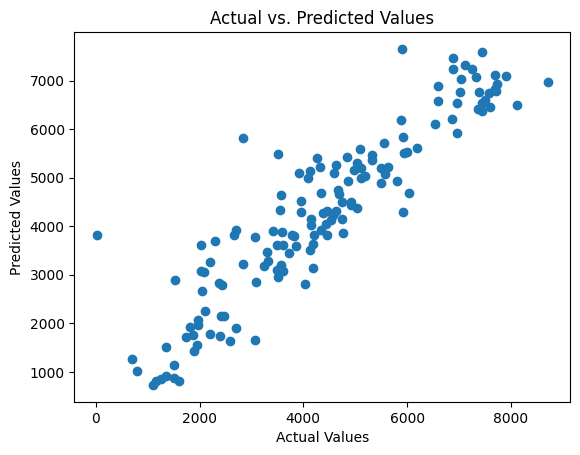

In [ ]:
# we now create a dataframe with the same features finally selected above:
# as all the variables are significant now and the vif is also less than 5 for all.
# 'const', 'yr', 'workingday', 'temp', 'atemp', 'windspeed',
# 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
# 'mnth_may', 'mnth_nov', 'mnth_sep', 'weekday_sun', 'weathersit_cloudy',
# 'weathersit_misty'

cols=list(X.columns)

# Convert X_test_scaled to DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

# Get a list of columns from X_train_rfe excluding the 'const' column
X_train_rfe_columns = X_train_rfe.columns[1:]

# Keep only the columns that are in X_train_rfe_columns
X_test_scaled = X_test_scaled[X_train_rfe_columns]


# Add a constant
X_test_scaled = sm.add_constant(X_test_scaled)

print(X_train_rfe.columns)
print(X_test_scaled.columns)


# Make predictions on the test set
y_pred = lr.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
# we check how the model performs on the test set. r2 score of 0.832 is not very different from r2 score on train set of 0.847
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8326146612840647

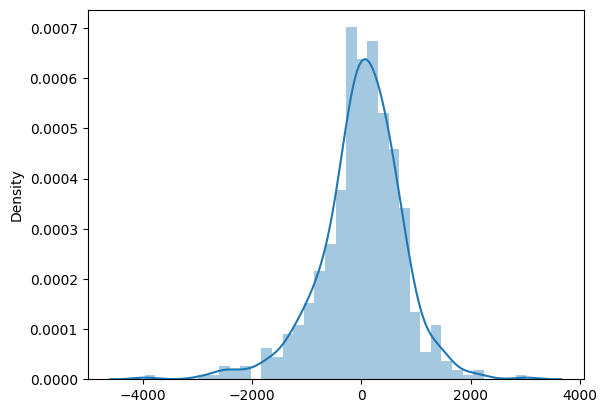

In [ ]:
# we plot to see that the residuals are close to normal, though slightly peaked.
y_pred_train=lr.predict(X_train_rfe)
resid=y_train-y_pred_train
sns.distplot(resid)
plt.show()

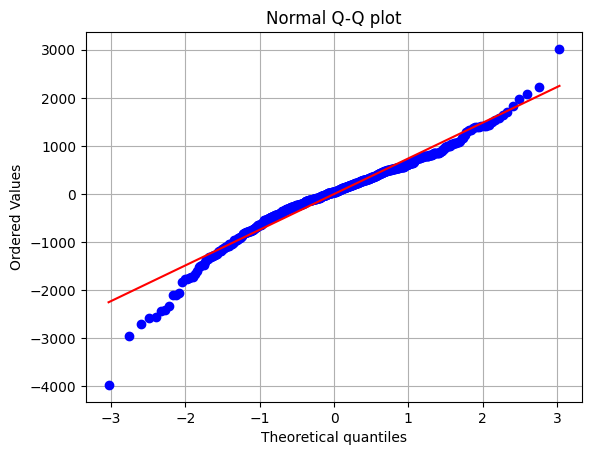

In [ ]:
# we prepare the Q-Q plot to check if the error distribution is normal or not. We find evidence of non-normal and outliers
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate example data

data = resid

# Create Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()


# Thus our final model is

cnt = 2831.0805 + yr * 3778.3653 + workingday * -1491.7928 + temp * -904.9624 + atemp * 2018.3781 + windspeed * 402.3615 + season_spring * -1124.5386 + season_winter * 813.5149 + mnth_dec * -479.9611 +   mnth_jul * -564.0854 + mnth_mar * 360.0866 + mnth_may * 314.9842 + mnth_nov * -648.2251 + mnth_sep * 435.4007 + weekday_sun * 445.2129 +
weathersit_cloudy * -1841.5558 + weathersit_misty * -469.9609


In [ ]:
# This function is used to build the model and display the summary of the model
def build_model(X, y):
    X = sm.add_constant(X) # Adding a constant
    lm = sm.OLS(y, X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

# This function is used to check the VIF values of the features
def checkVIF(X): # Function to check VIF
    vif = pd.DataFrame() # Create a dataframe to store the VIF values
    vif['Features'] = X.columns # Store the column names in the dataframe i.e. the feature names
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Calculate the VIF values for each feature
    vif['VIF'] = round(vif['VIF'], 2) # Round off the VIF values to 2 decimal places
    vif = vif.sort_values(by = "VIF", ascending = False) # Sort the VIF values in descending order
    return(vif)

## Some Notes-
  1. We could have dropped one of atemp or temp as they are highly correlated
  2. The VIF calculated for some values come out to be inf suggesting perfect multi-collinearity
  3. We could also do Ridge, Lasso and Elastic net regression to address the problem of multicollinearity. I did this but not reporting keeping in mind the scope of the assignment
  4. I tried GridSearchCV along with RandomForest Regression, support vector regression too.
  5. Random Forest regressor appears to be the best
  